# KMEANS CLUSTERING

Apakah yang disebut dengan centroid pada Clustering?


Centroid adalah rata-rata jarak yang ada pada sebuah cluster, yang didapat dengan meelakukan rata-rata pada semua anggota suatu cluster tertentu.

Apa itu Silhouette Score?

Silhouette score atau Silhoette Index(SI) merupakan teknik validasi cluster yang dapat digunakan untuk memvalidasi  sebuah data, cluster tunggal (satu cluster dari sejumlah cluster) atau selutuh cluster. SI  menampilkan ukuran seberapa dekat setiap titik dalam satu cluster dengan titik-titik di  cluster tetangga dan dengan demikian memberikan cara untuk menilai parameter seperti 
jumlah cluster secara visual. Contoh untuk menghitung nilai SI dari data ke-I,  terdapat dua koefisien yakni a dan b. a merupakan rata-rata jarak antar data dalam satu cluster, sedangkan b adalah rata-rata jarak terkecil terhadap semua data dari cluster yang lain tidak dalam satu cluster. Nilai a digunakan untuk mengukur tingkat ketidakmiripan sebuah data dengan cluster yang diikutinya. Nilai b bertujuan untuk melihat tingkat ketidaksesuaian data terhadap cluster lain. Semakin besar nilai b, maka semakin tidak sesuai atau jelek data tersebut terhadap cluster lain

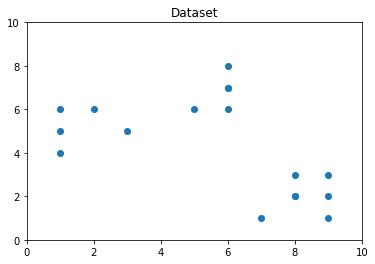

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 6, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

[[3 5]
 [1 4]
 [1 6]
 [2 6]
 [1 5]
 [6 8]
 [6 6]
 [6 7]
 [5 6]
 [6 7]
 [7 1]
 [8 2]
 [9 1]
 [8 2]
 [9 3]
 [9 2]
 [8 3]]
[[8.28571429 2.        ]
 [5.8        6.8       ]
 [1.6        5.2       ]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


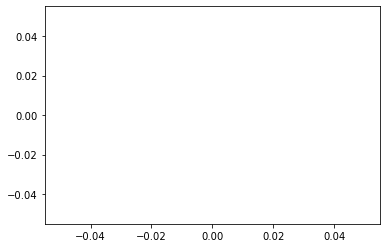

In [4]:
# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
print(X)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# KMeans algorithm 
K = 3
kmeans_model = KMeans(n_clusters=3).fit(X)

print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

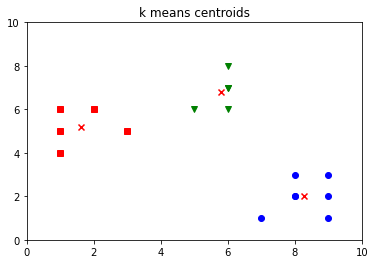

In [5]:
plt.plot()
plt.title('k means centroids')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [7]:
documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]



In [8]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)



In [9]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)



KMeans(max_iter=100, n_clusters=2, n_init=1)

In [10]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print



Top terms per cluster:
Cluster 0:
 google
 translate
 app
 feedback
 impressed
 map
 incredible
 extension
 promoter
 chrome
Cluster 1:
 cat
 best
 climbing
 ninja
 ve
 photo
 taken
 belly
 merley
 kitten


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)




Prediction
[0]


In [12]:

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

[1]
